<div style="clear: both; width: 100%; overflow: auto"><img src="img/yabox.png" style="width: 250px; float: left"/></div>

> Yabox: Yet another black-box optimization library for Python - https://github.com/pablormier/yabox

Tutorial of the basic functionality of Yabox

Author: Pablo Rodríguez-Mier, [@pablormier](https://twitter.com/PabloRMier)

# Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys

# Load Yabox (from local)
# Comment this line to use the installed version
sys.path.insert(0, '../')

import yabox as yb

# Import the DE implementations
from yabox.algorithms import DE, PDE
print('Yabox version: ', yb.__version__)

Yabox version:  1.1.0


# Basics

Easiest way to optimize a function is to pass it as a lambda function to DE and call `solve`. For example, find the minimum of the function $f = \sum_i x_i^2 + 1$ in 5 dimensions ($x = [x_0,\dots,x_4]$), bounding the search between -10 and 10 for each $x_i$:

In [19]:
DE(lambda x: sum(x**2) + 1, [(-10, 10)] * 5, maxiters=10000).solve(show_progress=True)

(array([[ 2.61763944e-09,  3.81970011e-09,  3.05075076e-10,
         -3.29102257e-09, -5.35349898e-09]]),
 1.0)

In many scenarios, the function to optimize may depend on many other components or other fixed parameters. It is very convenient to define a function to create your optimizable function. Here is an example of this, where `create_loss` is a function that prepares the data and returns another function to be optimize:

In [65]:
def create_loss(p1, p2, p3):
    # Prepare here whatever you need. Load parameters,
    # read from file, etc
    a = p1 * p2
    b = p2 / p3
    # Define the function to be optimized as an inner function
    # that can make use of the other parameters
    def f(x):
        return 1 + a*x - b*x**2 + 0.01*x**3 + 0.001 * x**4
    return f

f = create_loss(5, 2, 0.1)
f(0)

1.0

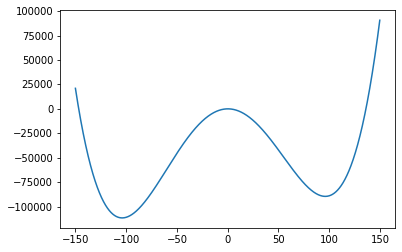

In [43]:
x = np.arange(-150, 150, 0.1)
plt.plot(x, f(x));

In [63]:
xo, yo = DE(f, [(-150, 150)], maxiters=1000).solve(show_progress=True)
xo, yo

(array([[-103.94039252]]), array([-111621.93226051]))

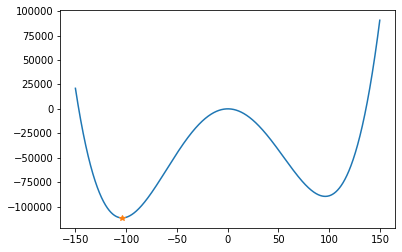

In [64]:
fig, ax = plt.subplots()
ax.plot(x, f(x));
ax.plot(xo[0][0], yo[0], '*')

You can control also the search process. Use `geniterator()` to get an iterator at the level of the population (by default, `.iterator()` returns an iterator at the level of individual (thus it iteraters maxiters * popsize  times)

In [67]:
# Control the iteration process
de = DE(f, [(-150, 150)], maxiters=30)
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    print(step.best_fitness, norm_vector, best_params[0])

[-79695.64776739] [0.26333499] [-70.99950227]
[-89871.02737402] [0.24074883] [-77.77534998]
[-89871.02737402] [0.24074883] [-77.77534998]
[-91053.15530339] [0.23795163] [-78.61451093]
[-97210.93178287] [0.22241614] [-83.27515819]
[-110556.19311946] [0.1708188] [-98.75436014]
[-110556.19311946] [0.1708188] [-98.75436014]
[-111186.87686619] [0.16447298] [-100.65810671]
[-111555.89127852] [0.15775271] [-102.67418668]
[-111555.89127852] [0.15775271] [-102.67418668]
[-111555.89127852] [0.15775271] [-102.67418668]
[-111572.57070825] [0.14992452] [-105.02264334]
[-111572.57070825] [0.14992452] [-105.02264334]
[-111572.57070825] [0.14992452] [-105.02264334]
[-111599.04208511] [0.15601054] [-103.19683851]
[-111599.04208511] [0.15601054] [-103.19683851]
[-111614.19343449] [0.1520991] [-104.37026969]
[-111614.19343449] [0.1520991] [-104.37026969]
[-111621.92806358] [0.15356547] [-103.93036017]
[-111621.92806358] [0.15356547] [-103.93036017]
[-111621.92806358] [0.15356547] [-103.93036017]
[-111621